# 3) 연애 시절 / 결혼생활 사람들의 고민은 무엇일까?

# 네이트판 연애/결혼 고민 스크래핑

In [459]:
import requests

In [460]:
import lxml.html

In [461]:
url = 'http://m.todayhumor.co.kr/list.php?table=wedlock&page={}'

In [462]:
url

'http://m.todayhumor.co.kr/list.php?table=wedlock&page={}'

In [463]:
texts = []
for page in range(1,200):
    res = requests.get(url.format(page))
    element = lxml.html.fromstring(res.content)
    for text in element.xpath('.//div[@class="listLineBox list_tr_wedlock"]'):
        texts.append([
                text.find('.//h2[@class="listSubject"]').text
                    ])

In [464]:
import csv

In [465]:
with open('Dating12.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerows(texts)

In [466]:
with open('Dating12.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    texts = list(reader)

In [467]:
len(texts)

207

# 3) 단어 추출

In [468]:
from sklearn.feature_extraction.text import CountVectorizer

In [469]:
from konlpy.tag import Twitter

In [470]:
tagger = Twitter()

In [471]:
def get_word(text):
    nouns = tagger.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]

In [472]:
cv = CountVectorizer(tokenizer=get_word, max_features=1000)

In [473]:
tdm = cv.fit_transform([r[0] for r in texts])

In [474]:
noun_list = cv.get_feature_names()

In [475]:
noun_list

['가슴',
 '가장',
 '가족',
 '가지',
 '간과',
 '간다',
 '감사',
 '감정',
 '개시',
 '개월차',
 '거리',
 '거주',
 '게시',
 '게시판',
 '게시판글',
 '게임',
 '결게',
 '결정',
 '결혼',
 '결혼기념일',
 '결혼식',
 '경우',
 '고민',
 '고요',
 '고찰',
 '공감',
 '공식',
 '공유',
 '과부',
 '관련',
 '관리',
 '그냥',
 '글자',
 '금요일',
 '금은',
 '기념',
 '기독교',
 '기왕',
 '기웃',
 '기혼',
 '나름',
 '남자',
 '남편',
 '년차',
 '노하우',
 '농담',
 '느낌',
 '능력',
 '닉네임',
 '다른',
 '단어',
 '대령',
 '대여',
 '대한',
 '동그라미',
 '동기',
 '땅불',
 '때문',
 '로망',
 '리수',
 '마상',
 '마음',
 '마쳣습니',
 '만원',
 '말씀',
 '메달',
 '모두',
 '문득',
 '문제',
 '문화',
 '미혼',
 '민간인',
 '바람',
 '바로',
 '반지',
 '버스',
 '베스트',
 '보고',
 '보석',
 '복불복',
 '본질',
 '부대',
 '부부',
 '부분',
 '부여',
 '부인',
 '비무장지대',
 '빵점',
 '사격',
 '사고',
 '사람',
 '사람과',
 '사실',
 '사탕',
 '삭금',
 '살림살이',
 '살인',
 '상견례',
 '상대',
 '상대자',
 '상이',
 '새댁',
 '생각',
 '생기',
 '생활',
 '선배',
 '선택',
 '성공',
 '성관계',
 '세모',
 '세상',
 '세월',
 '소원',
 '손잡이',
 '손해',
 '솔로',
 '숙고',
 '스트레스',
 '시작',
 '시집',
 '신랑',
 '신혼',
 '실탄',
 '심사',
 '아내',
 '아버지',
 '아부지',
 '아직',
 '악세사리',
 '안해',
 '애기',
 '야구',
 '얘기',
 '어가',
 '어머',
 '어머나',
 '어어',
 '언니'

# 결혼생활 고민단어

In [476]:
import numpy

In [477]:
numpy.save('tdm.npy', tdm)

In [478]:
with open('M_nouns.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(noun_list))

In [479]:
tdm = numpy.load('tdm.npy').tolist()

In [480]:
with open('M_nouns.txt', encoding='utf8') as f:
    noun_list = f.read().splitlines()

In [481]:
count_mat = tdm.sum(axis=0)

In [482]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [483]:
word_count = list(zip(noun_list, count))

In [484]:
word_count

[('가슴', 1),
 ('가장', 1),
 ('가족', 1),
 ('가지', 2),
 ('간과', 1),
 ('간다', 1),
 ('감사', 1),
 ('감정', 1),
 ('개시', 1),
 ('개월차', 1),
 ('거리', 1),
 ('거주', 1),
 ('게시', 1),
 ('게시판', 45),
 ('게시판글', 2),
 ('게임', 1),
 ('결게', 1),
 ('결정', 1),
 ('결혼', 102),
 ('결혼기념일', 1),
 ('결혼식', 1),
 ('경우', 1),
 ('고민', 1),
 ('고요', 1),
 ('고찰', 1),
 ('공감', 1),
 ('공식', 1),
 ('공유', 1),
 ('과부', 1),
 ('관련', 3),
 ('관리', 1),
 ('그냥', 1),
 ('글자', 1),
 ('금요일', 1),
 ('금은', 2),
 ('기념', 1),
 ('기독교', 1),
 ('기왕', 1),
 ('기웃', 1),
 ('기혼', 3),
 ('나름', 1),
 ('남자', 1),
 ('남편', 5),
 ('년차', 2),
 ('노하우', 1),
 ('농담', 1),
 ('느낌', 2),
 ('능력', 1),
 ('닉네임', 1),
 ('다른', 1),
 ('단어', 1),
 ('대령', 1),
 ('대여', 1),
 ('대한', 5),
 ('동그라미', 1),
 ('동기', 1),
 ('땅불', 1),
 ('때문', 2),
 ('로망', 1),
 ('리수', 1),
 ('마상', 1),
 ('마음', 1),
 ('마쳣습니', 1),
 ('만원', 2),
 ('말씀', 1),
 ('메달', 1),
 ('모두', 1),
 ('문득', 1),
 ('문제', 1),
 ('문화', 1),
 ('미혼', 2),
 ('민간인', 3),
 ('바람', 1),
 ('바로', 1),
 ('반지', 10),
 ('버스', 1),
 ('베스트', 1),
 ('보고', 2),
 ('보석', 6),
 ('복불복', 1),
 ('본질', 1),
 ('부대

In [485]:
import operator

In [486]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('결혼', 102),
 ('게시판', 45),
 ('생활', 19),
 ('여기', 11),
 ('반지', 10),
 ('사람', 8),
 ('보석', 6),
 ('연애', 6),
 ('이유', 6),
 ('남편', 5),
 ('대한', 5),
 ('후회', 5),
 ('오유', 4),
 ('조언', 4),
 ('질문', 4),
 ('관련', 3),
 ('기혼', 3),
 ('민간인', 3),
 ('사람과', 3),
 ('사탕', 3),
 ('선배', 3),
 ('세상', 3),
 ('솔로', 3),
 ('신랑', 3),
 ('인생', 3),
 ('저희', 3),
 ('적국', 3),
 ('정말', 3),
 ('징어', 3),
 ('평생', 3),
 ('하나', 3),
 ('해도', 3),
 ('가지', 2),
 ('게시판글', 2),
 ('금은', 2),
 ('년차', 2),
 ('느낌', 2),
 ('때문', 2),
 ('만원', 2),
 ('미혼', 2),
 ('보고', 2),
 ('비무장지대', 2),
 ('사실', 2),
 ('상대', 2),
 ('상이', 2),
 ('손해', 2),
 ('아내', 2),
 ('오픈', 2),
 ('유부', 2),
 ('육아', 2),
 ('이야기', 2),
 ('이제', 2),
 ('인증', 2),
 ('일이', 2),
 ('제일', 2),
 ('지금', 2),
 ('환상', 2),
 ('가슴', 1),
 ('가장', 1),
 ('가족', 1),
 ('간과', 1),
 ('간다', 1),
 ('감사', 1),
 ('감정', 1),
 ('개시', 1),
 ('개월차', 1),
 ('거리', 1),
 ('거주', 1),
 ('게시', 1),
 ('게임', 1),
 ('결게', 1),
 ('결정', 1),
 ('결혼기념일', 1),
 ('결혼식', 1),
 ('경우', 1),
 ('고민', 1),
 ('고요', 1),
 ('고찰', 1),
 ('공감', 1),
 ('공식', 1),
 ('공유', 1),
 ('과부', 

# 결혼생활고민 단어시각화

In [487]:
%matplotlib inline

In [488]:
from wordcloud import WordCloud

In [489]:
from matplotlib import pyplot

In [490]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='purple', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

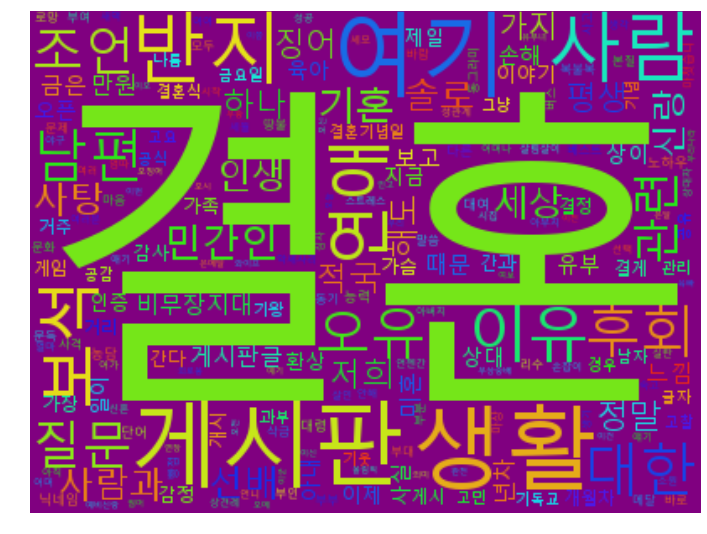

In [491]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 연애시절 고민단어

In [492]:
with open('D_nouns.txt', encoding='utf8') as f:
    noun_list2 = f.read().splitlines()

In [493]:
count_mat = tdm.sum(axis=0)

In [494]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [495]:
word_count = list(zip(noun_list2, count))

In [496]:
word_count

[('\ufeff가가', 1),
 ('가면', 1),
 ('가요', 1),
 ('갑자기', 2),
 ('강간', 1),
 ('개월전', 1),
 ('거절', 1),
 ('결혼', 1),
 ('경험', 1),
 ('고백', 1),
 ('공감', 1),
 ('관계', 1),
 ('관심', 1),
 ('군인', 45),
 ('그동안', 2),
 ('기분', 1),
 ('기적', 1),
 ('길거리', 1),
 ('남사', 102),
 ('남자', 1),
 ('남자친구', 1),
 ('남친', 1),
 ('너무', 1),
 ('다른', 1),
 ('다른사람', 1),
 ('다시', 1),
 ('단계', 1),
 ('대요', 1),
 ('대처', 1),
 ('대한', 3),
 ('대해', 1),
 ('데이트', 1),
 ('동안', 1),
 ('뒷목보일', 1),
 ('또박또박', 2),
 ('라면', 1),
 ('리뷰', 1),
 ('만난', 1),
 ('만큼', 1),
 ('맞춤법', 3),
 ('매일', 1),
 ('메세지', 1),
 ('멘붕', 5),
 ('모질', 2),
 ('무슨', 1),
 ('문제', 1),
 ('미리', 2),
 ('믿음', 1),
 ('바람', 1),
 ('반응', 1),
 ('방금', 1),
 ('방법', 1),
 ('보통', 1),
 ('봉숭아', 5),
 ('분노', 1),
 ('사건', 1),
 ('사당', 1),
 ('사람', 2),
 ('사랑', 1),
 ('사후', 1),
 ('삼각관계', 1),
 ('상심', 1),
 ('상처', 1),
 ('상태', 2),
 ('상황', 1),
 ('생각', 1),
 ('서여', 1),
 ('서울', 1),
 ('선물', 1),
 ('선배', 1),
 ('성격', 2),
 ('소개팅', 3),
 ('숙박', 1),
 ('스압', 1),
 ('시간', 10),
 ('시골', 1),
 ('신뢰', 1),
 ('신촌', 2),
 ('신호', 6),
 ('심리', 1),
 ('썸남', 1),

In [497]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('남사', 102),
 ('군인', 45),
 ('원래', 19),
 ('집착', 11),
 ('시간', 10),
 ('언제', 8),
 ('신호', 6),
 ('초성', 6),
 ('리허설', 6),
 ('멘붕', 5),
 ('봉숭아', 5),
 ('폭력', 5),
 ('하나요', 4),
 ('에서', 4),
 ('여친', 4),
 ('대한', 3),
 ('맞춤법', 3),
 ('소개팅', 3),
 ('여교사', 3),
 ('여사', 3),
 ('위해', 3),
 ('이상', 3),
 ('인기', 3),
 ('일이', 3),
 ('보신', 3),
 ('시간', 3),
 ('실행', 3),
 ('아이', 3),
 ('영국인', 3),
 ('작품', 3),
 ('전부', 3),
 ('짝사랑', 3),
 ('갑자기', 2),
 ('그동안', 2),
 ('또박또박', 2),
 ('모질', 2),
 ('미리', 2),
 ('사람', 2),
 ('상태', 2),
 ('성격', 2),
 ('신촌', 2),
 ('어장', 2),
 ('여러분', 2),
 ('연락', 2),
 ('연인', 2),
 ('이지', 2),
 ('잔인', 2),
 ('해석', 2),
 ('난무', 2),
 ('남자친구', 2),
 ('대화', 2),
 ('모퉁이', 2),
 ('부부', 2),
 ('사이', 2),
 ('야외', 2),
 ('여성', 2),
 ('커플', 2),
 ('\ufeff가가', 1),
 ('가면', 1),
 ('가요', 1),
 ('강간', 1),
 ('개월전', 1),
 ('거절', 1),
 ('결혼', 1),
 ('경험', 1),
 ('고백', 1),
 ('공감', 1),
 ('관계', 1),
 ('관심', 1),
 ('기분', 1),
 ('기적', 1),
 ('길거리', 1),
 ('남자', 1),
 ('남자친구', 1),
 ('남친', 1),
 ('너무', 1),
 ('다른', 1),
 ('다른사람', 1),
 ('다시', 1),
 ('단계', 1),
 ('대요'

# 연애시절고민민 단어시각화

In [498]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='White', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

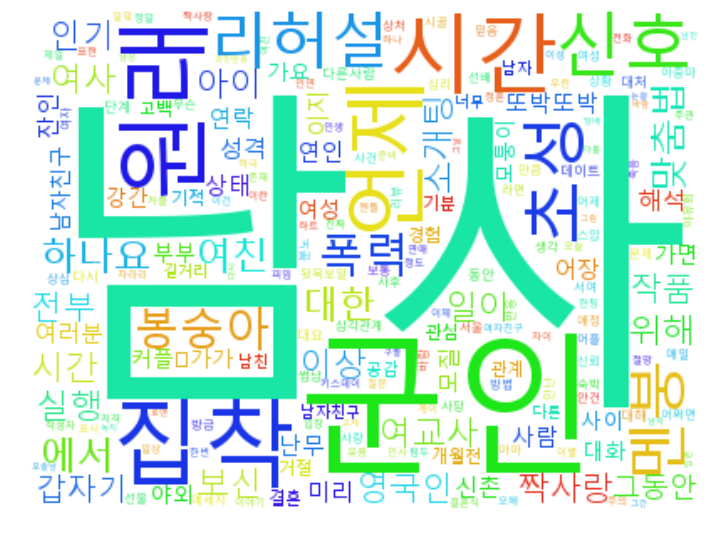

In [499]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

# 결론 :

# 연애시절 : 
# 남사(남자사람친구), 군인, 집착 등의 검색어를 통해 남자보다는 주로 여성들이 연애고민들을 SNS에 게시하는 경향을 띈다.

# 결혼생활 : 
# 결혼, 생활 등 연애 때의 상대방에 대한 관심보다는 실제적인 결혼생활에 대한 높은 관심 경향을 띈다. 